# Predicting Term Deposit Subscription

## Dataset Info

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Dataset Source

According to documentation, this is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository.
<br>
**Source:**
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Objectives

The goal is to predict if a client will subscribe a term deposit from direct marketing campaigns of a Portuguese banking institution.
<br>

According Investopedia, term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

## Attributes Description

1. **age** : (numeric)
<br>
1. **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
<br>
1. **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>
1. **education** : (categorical: primary, secondary, tertiary and unknown)
<br>
1. **default** : has credit in default? (categorical: 'no','yes','unknown')
<br>
1. **housing** : has housing loan? (categorical: 'no','yes','unknown')
<br>
1. **loan** : has personal loan? (categorical: 'no','yes','unknown')
<br>
1. **balance** : Balance of the individual.
<br>
1. **contact** : contact communication type (categorical: 'cellular','telephone')
<br>
1. **month** : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>
1. **day** : last contact day of the month (numeric: 1,2,3,....29,30)
<br>
1. **duration** : last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br>
1. **campaign** : number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>
1. **pdays** : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>
1. **previous** : number of contacts performed before this campaign and for this client (numeric)
<br>
1. **poutcome** : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>
1. **deposit** : has the client subscribed a term deposit? (binary: 'yes','no')

## Import Library

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, f1_score, log_loss, matthews_corrcoef, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
%matplotlib inline

## Preprocessing Data

In [7]:
df = pd.read_csv('bank.csv')

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


From data info above, we can conclude that:
- There is no missing value data
- There is 11162 rows data with kind of data types: integer and object, some attributes still in object type/ categorical data, so we will convert categorical data with Label Encoding before modeling

In [105]:
df.shape

(11162, 17)

In [141]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,76,"[29, 68]"
1,job,object,0,0.0,12,"[entrepreneur, admin.]"
2,marital,object,0,0.0,3,"[married, single]"
3,education,object,0,0.0,4,"[tertiary, unknown]"
4,default,object,0,0.0,2,"[yes, no]"
5,balance,int64,0,0.0,3805,"[1435, 1220]"
6,housing,object,0,0.0,2,"[yes, no]"
7,loan,object,0,0.0,2,"[yes, no]"
8,contact,object,0,0.0,3,"[cellular, unknown]"
9,day,int64,0,0.0,31,"[15, 30]"


In [142]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

From table above, we can tell that there is no Null Value in each attributes

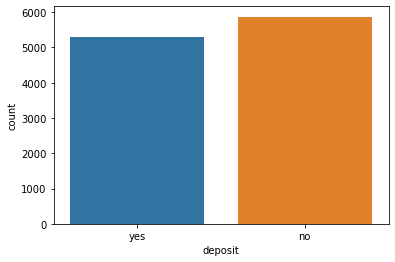

In [143]:
sns.countplot(df['deposit'])

In [109]:
df['deposit'].value_counts(normalize=True)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

Proportion between people who subscribe term deposit and not is quite balanced

## Exploratory Data Analysis (EDA)

### Numerical Data Exploration

In [110]:
num_cols = df.select_dtypes(['int64']).columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

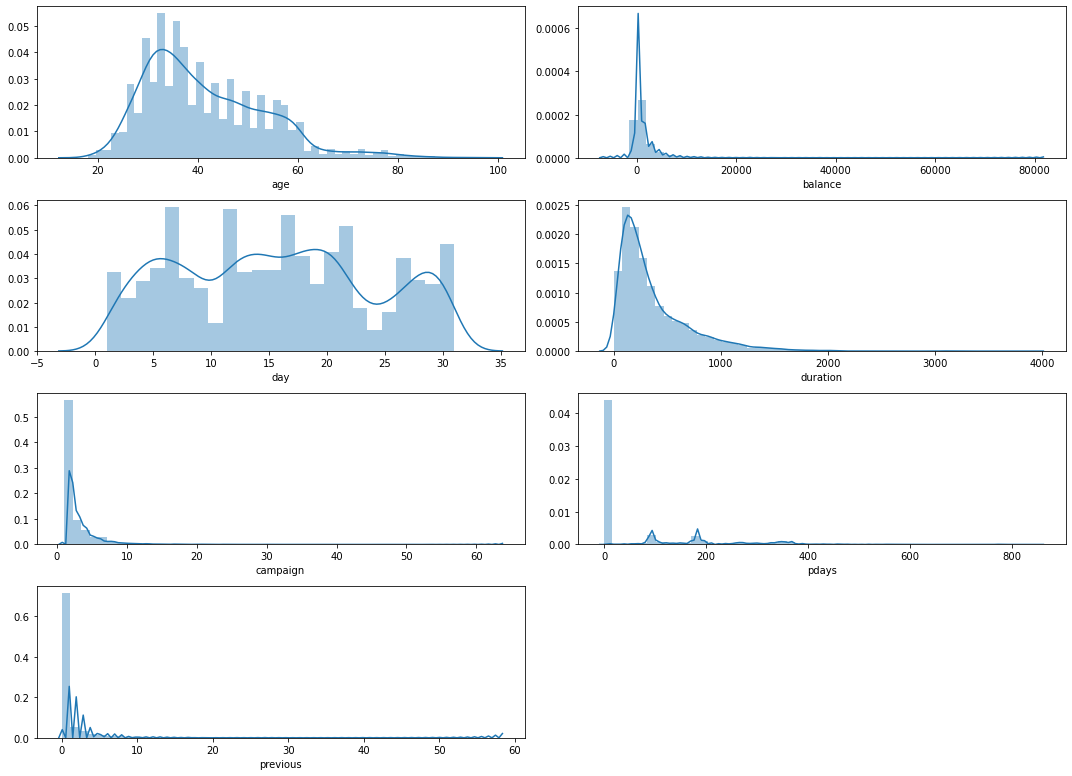

In [144]:
def draw_distplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,40))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.distplot(dataframe[feature],ax=ax)
        
    fig.tight_layout()  
    plt.show()
    
draw_distplots(df,num_cols,15,2)

From distribution diagram above, we can tell that: most numerical data attributes have right skewt, statistically the central tendency of the data should follow median numbers and the data seems quite diverse

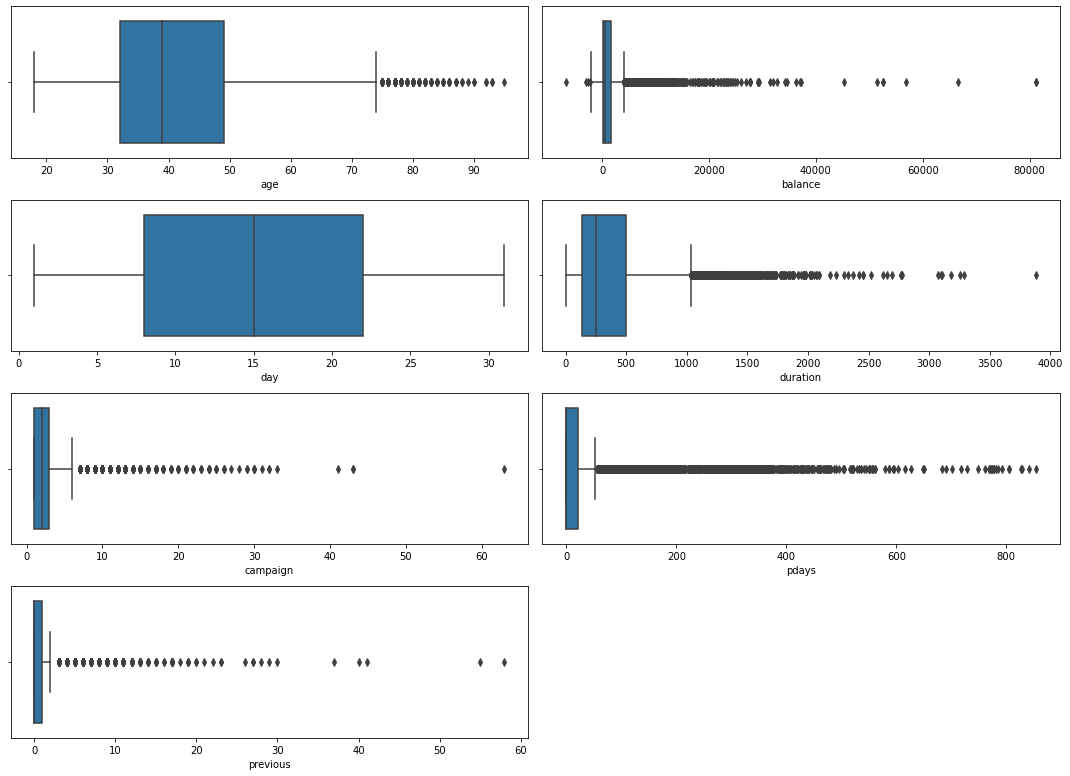

In [145]:
def draw_boxplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,40))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(dataframe[feature],ax=ax)
        
    fig.tight_layout()  
    plt.show()
    
draw_boxplots(df,num_cols,15,2)

In [113]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

age           171
balance      1055
campaign      601
contact         0
day             0
default         0
deposit         0
duration      636
education       0
housing         0
job             0
loan            0
marital         0
month           0
pdays        2750
poutcome        0
previous     1258
dtype: int64

In [114]:
df.describe()[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


From boxplot diagram above, we can tell that attributes: age, balance, duration, campaign, pdays, and previous have a lot of outliers data.
<br>

Statistically can tell that :
- We have clients of the youngest 18 years old and the oldest clients 95 years old
- Average clients balance is 1,528, the lowest balance amount is minus 6,847 and the highest amount balance is 81,204
- Average last contact is 15 days, with minimum 1 day last contact and maximum 31 days last contact 
- Average number of contact (campaign) is 2 - 3 times, with minimum 1 time number of contact and maximum 63 times number of contact
- We still need to explore what is -1 pdays represent in number of day passed by after the client was last contacted from a previous campaign 

### Categorical Data Exploration

In [115]:
cat_cols=df.select_dtypes(['object']).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

IndexError: index 3 is out of bounds for axis 0 with size 3

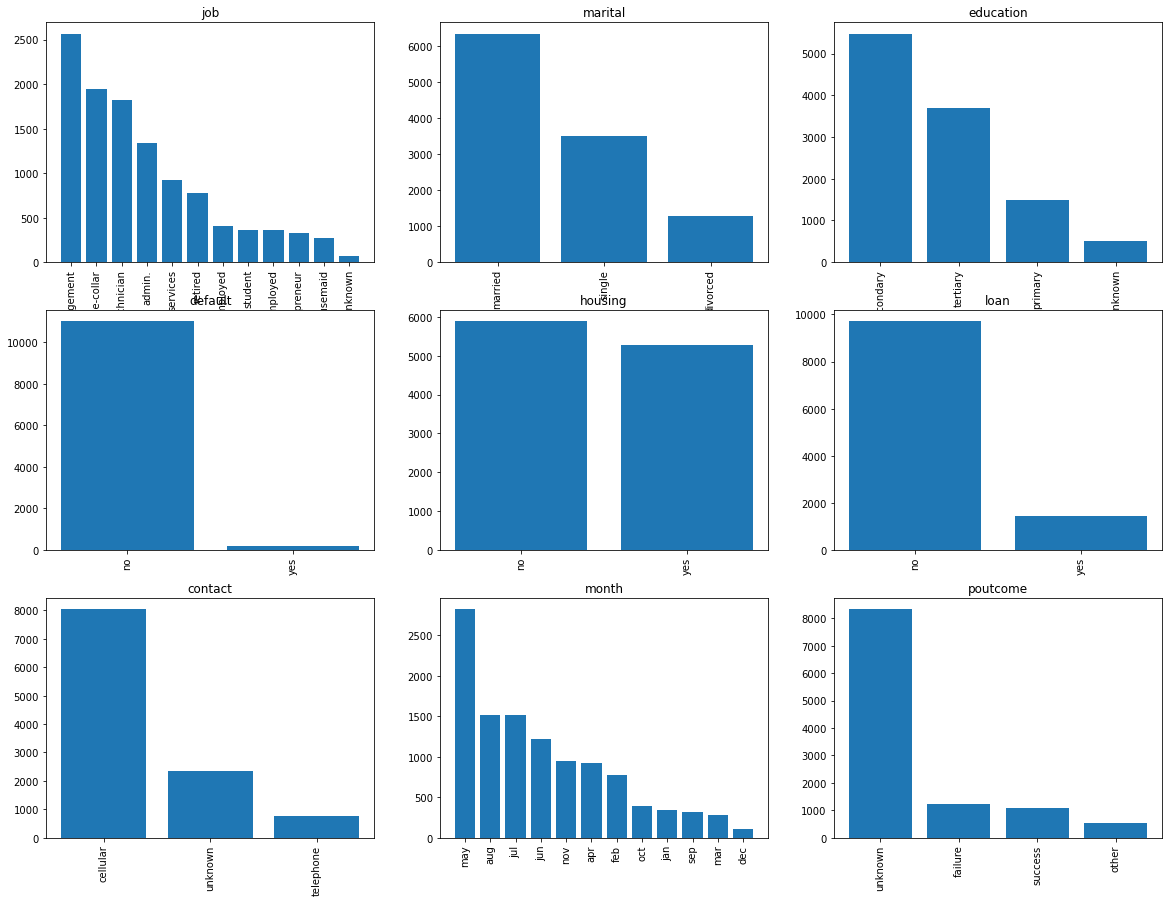

In [116]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_cols in cat_cols:
    value_counts = df[cat_cols].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_cols)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

From barplot diagram above, we can tell that:
- Job profession is dominated from client who work as management, blue-collar, and technician
- Most client population is married
- Majority of client population are come from Secondary education level 
- Age population is between 20-60 years old
- Contacted clients are mostly from people who work as management, blue-collar, and technician. We also can tell that housemaid is less likely to be contacted to offer term deposit
- Most population tend to have housing loan but not have personal loan
- Clients population is most likely being contacted with cellular
- May - Aug is the bussiest month to contact the client customers to offer term deposit

### Deposit Analysis with Client Information

### Age

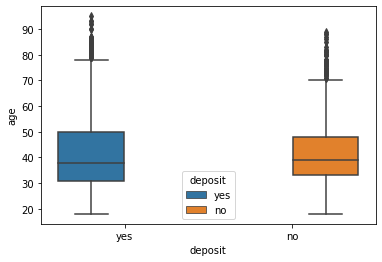

In [146]:
sns.boxplot(x="deposit", y="age", hue="deposit", data=df)

From diagram above, we can tell that client who subscribe term deposit and not is quite balanced. Both client who subscribe and not subscribe term deposit have many old clients outliers numbers 

### Personal Loan, Housing Loan, Default on Credit

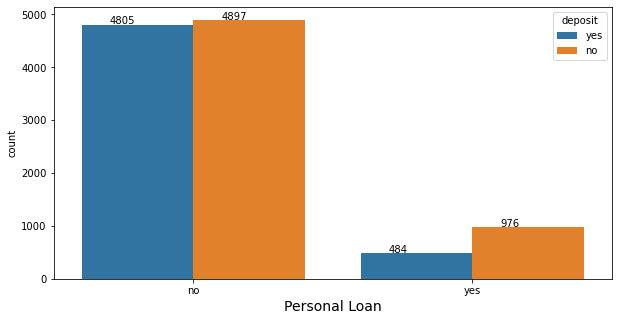

In [147]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="loan", hue="deposit", data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xlabel("Personal Loan", fontsize=14)
plt.show()

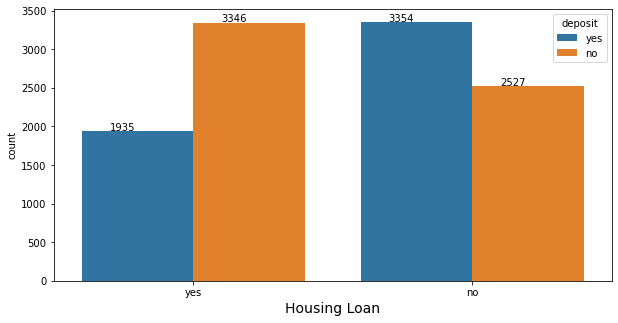

In [148]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="housing", hue="deposit", data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xlabel("Housing Loan", fontsize=14)
plt.show()

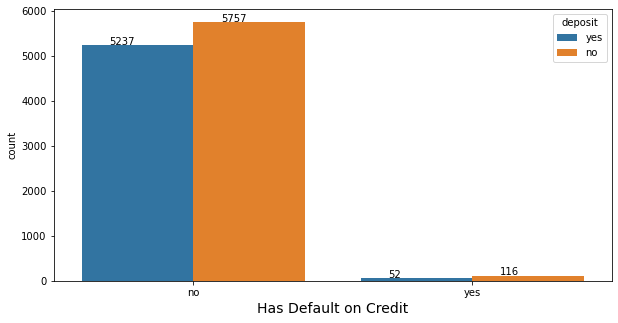

In [149]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="default", hue="deposit", data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xlabel("Has Default on Credit", fontsize=14)
plt.show()

From diagram above, we can tell that for clients who have some debt that need to be paid, they are tend to not subscribe term deposit

### Marital Status

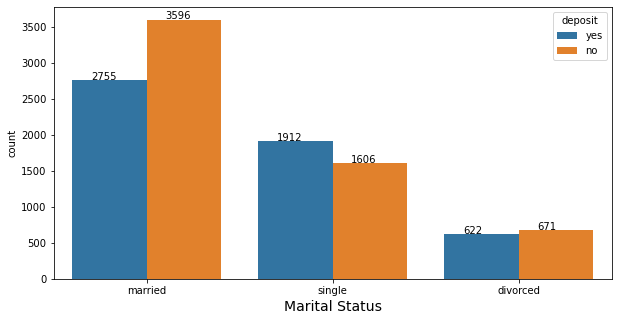

In [150]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="marital", hue="deposit", data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xlabel('Marital Status', fontsize=14)
plt.show()

If we look from Marital client's status, we can tell that married clients are the most population who subscribe term deposit and either not subscribe term deposit

### Education Level

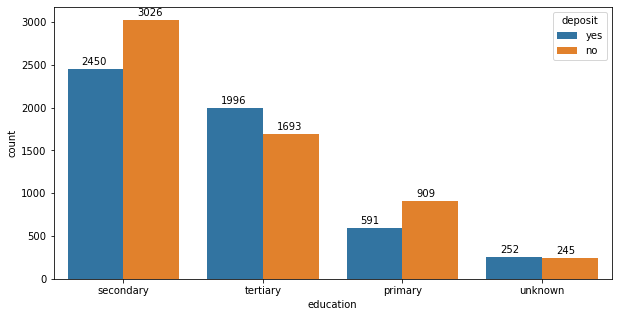

In [152]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="education", hue="deposit", data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

From education level side, we can tell that clients who subscribe term deposit the most are come from secondary level. The highest education level, the higher numbers of term deposit subscriber

### Job Profession

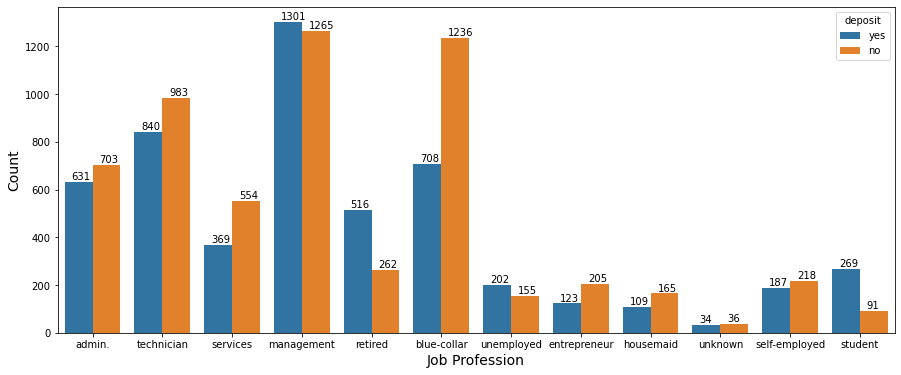

In [153]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x="job", hue="deposit", data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xlabel('Job Profession', fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

From diagram above, we can tell that clients who work is as management is the highest population that subscribe term deposit and the lowest clients population that not subscribe term deposit are come from clients who work as blue-collar 

### Balance

(-3000.0, 6000.0)

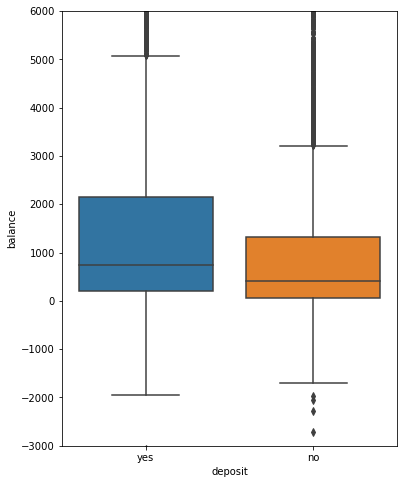

In [154]:
plt.figure(figsize=(6, 8))
sns.boxplot(x="deposit", y="balance", data=df)
plt.ylim(-3000, 6000)

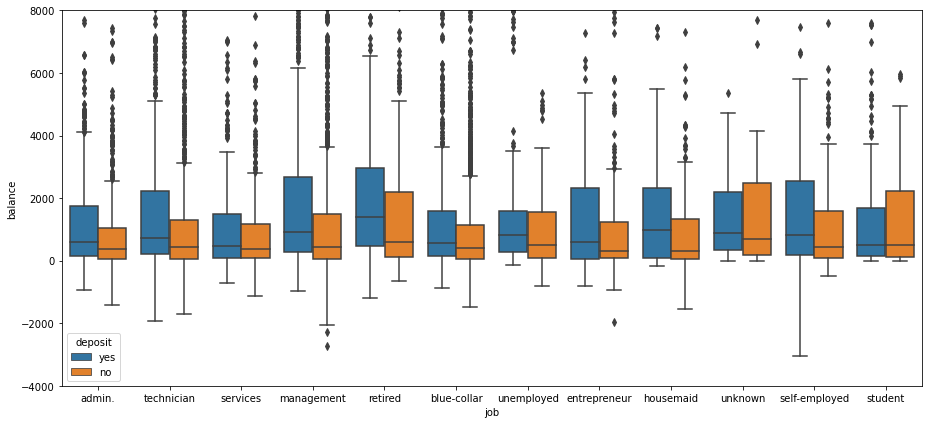

In [155]:
plt.figure(figsize=(13, 6))
sns.boxplot(x="job", y="balance", hue="deposit", data=df)
plt.ylim(-4000, 8000)
plt.tight_layout()

We can tell that the median balance of client who subscribe term deposit is higher than those client who dont subscribe term deposit in almost all job categories 

### Explore Client Who Have Loan

In [9]:
def has_loan(loans):
    a, b, c = loans
    if a=='yes' or b=='yes' or c=='yes':
        return 1
    else:
        return 0
    
df['has_loans'] = df[['default', 'housing', 'loan']].apply(has_loan, axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,has_loans
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0


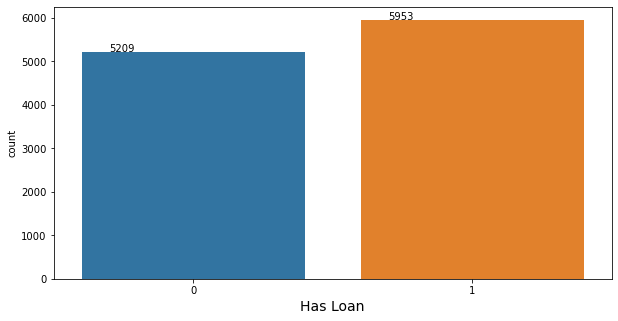

In [10]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="has_loans", data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xlabel("Has Loan", fontsize=14)
plt.show()

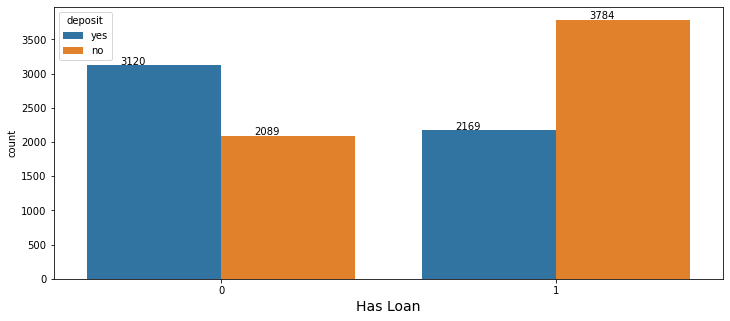

In [11]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(x="has_loans", hue="deposit", data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xlabel("Has Loan", fontsize=14)
plt.show()

In [12]:
df_has_loan_deposit = df[(df['has_loans']==1) & (df['deposit']=='yes')]
df_has_loan_deposit.shape

(2169, 18)

There are 2169 clients who has loan but still want to subscribe term deposit

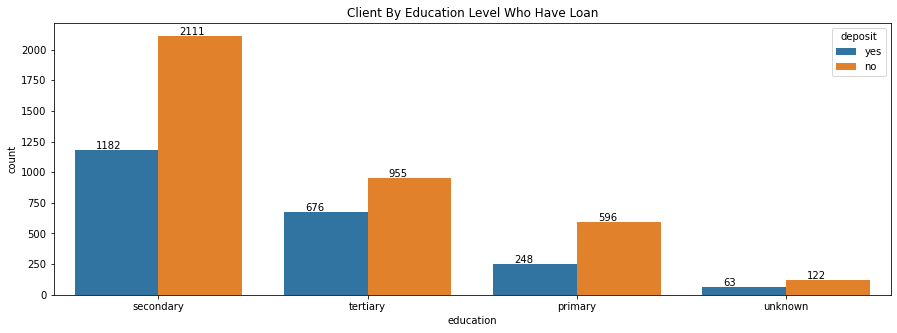

In [13]:
plt.figure(figsize=(15, 5))
plt.title("Client By Education Level Who Have Loan", fontsize=12)
ax = sns.countplot(x='education', hue='deposit', data=df[df['has_loans']==1])
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

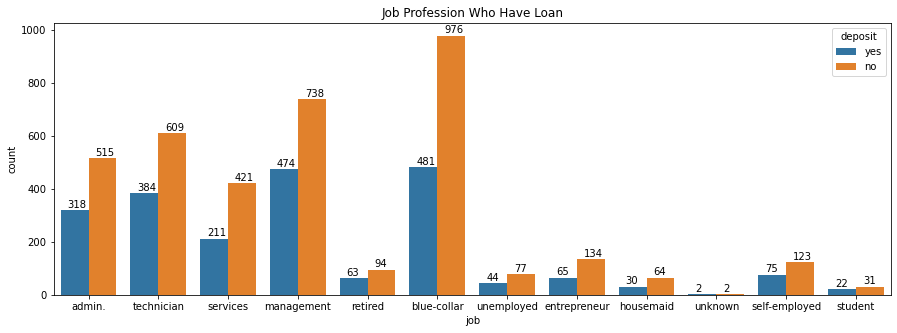

In [162]:
plt.figure(figsize=(15, 5))
plt.title("Job Profession Who Have Loan", fontsize=12)
ax = sns.countplot(x='job', hue='deposit', data=df[df['has_loans']==1])
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

(-2500.0, 7000.0)

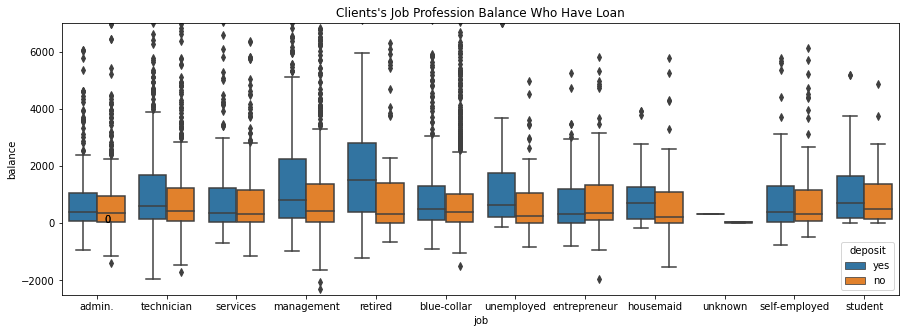

In [163]:
plt.figure(figsize=(15, 5))
plt.title("Clients's Job Profession Balance Who Have Loan", fontsize=12)
ax = sns.boxplot(x='job', y='balance', hue='deposit', data=df[df['has_loans']==1], orient='v' )
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.ylim(-2500, 7000)

From diagram above we can tell:
- It doesn't matter what education and profession is, there are always clients who subscribe term deposit
- There is not signifant median balance differences between clients who open term deposit and not
- We can assume that clients who open term deposit but still have loan, they  have good financial condition
- It will be easier to us to target client with loan, if we can know how much loan they have to pay every month or how long they have to pay their loan

### Explore Client Who Dont Have Loan

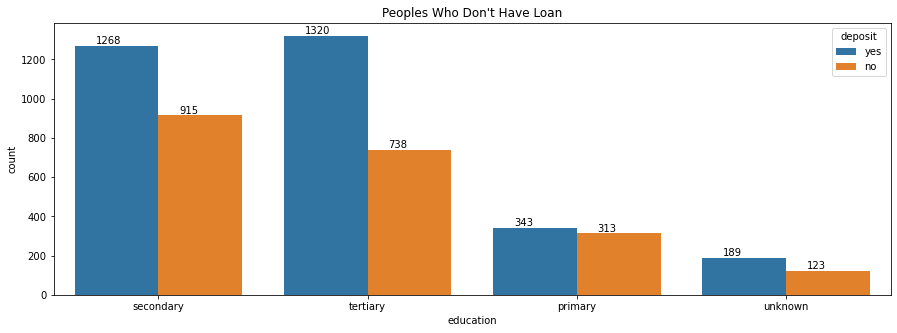

In [165]:
plt.figure(figsize=(15, 5))
plt.title("Peoples Who Don't Have Loan", fontsize=12)
ax = sns.countplot(x='education', hue='deposit', data=df[df['has_loans']==0])
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

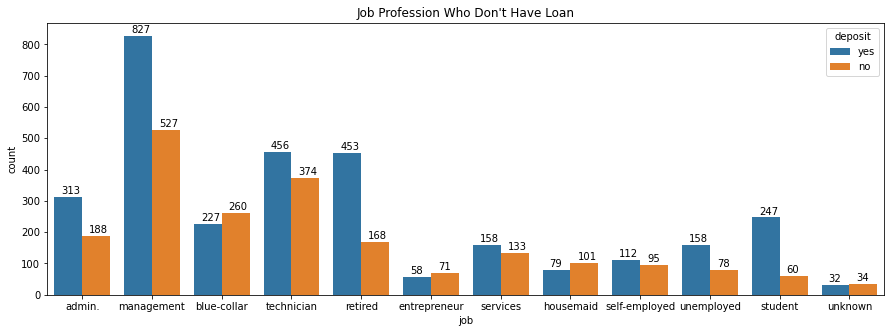

In [166]:
plt.figure(figsize=(15, 5))
plt.title("Job Profession Who Don't Have Loan", fontsize=12)
ax = sns.countplot(x='job', hue='deposit', data=df[df['has_loans']==0])
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

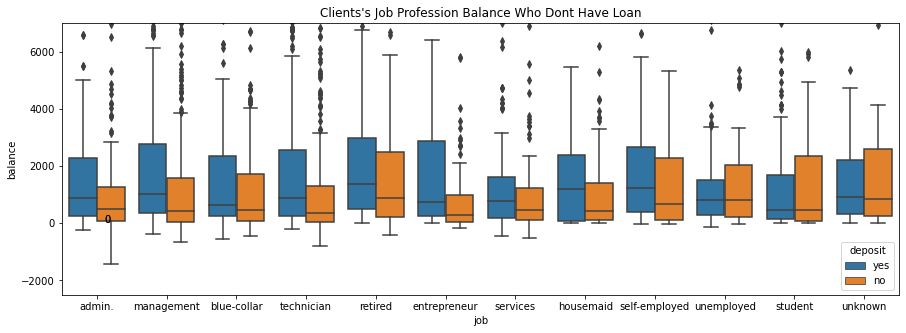

In [167]:
plt.figure(figsize=(15, 5))
plt.title("Clients's Job Profession Balance Who Dont Have Loan", fontsize=12)
ax = sns.boxplot(x='job', y='balance', hue='deposit', data=df[df['has_loans']==0], orient='v' )
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.ylim(-2500, 7000)
plt.show()

From diagram above, we can tell that clients in all job profession who dont have loan and not open term deposit have less median balance

At this point, we tell can that Loan-Free and having loan with sufficient good balance, good education background, clients who work as admin, management, technician, retired, and student are the important attributes of opening term deposit

### Deposit Relations with Communication Type Analysis

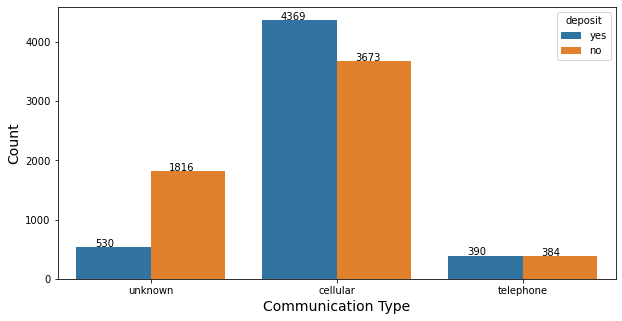

In [169]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="contact", hue="deposit", data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.ylabel("Count", fontsize=14)
plt.xlabel("Communication Type", fontsize=14)
plt.show()

In [170]:
print("Average contact duration with client who has subscribed: ", df[df['deposit']=='yes']['duration'].mean()/60)
print("Average contact duration with client who hasn't subscribed: ", df[df['deposit']=='no']['duration'].mean()/60)

Average contact duration with client who has subscribed:  8.954909560723515
Average contact duration with client who hasn't subscribed:  3.71883761848005


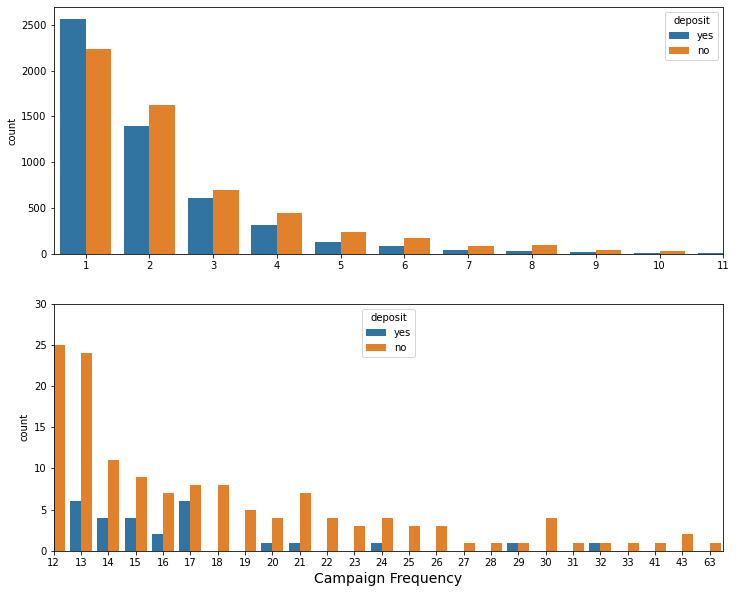

In [128]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.countplot(x='campaign', hue='deposit', data=df)
plt.xlim(right=10)
plt.xlabel('')
plt.subplot(2, 1, 2)
sns.countplot(x='campaign', hue='deposit', data=df)
plt.xlim(left=11)
plt.ylim(top=30)
plt.xlabel('Campaign Frequency', fontsize=14)
plt.show()

From diagram above, we can tell that the more often client is contacted, the lesser number of subscribed deposit is

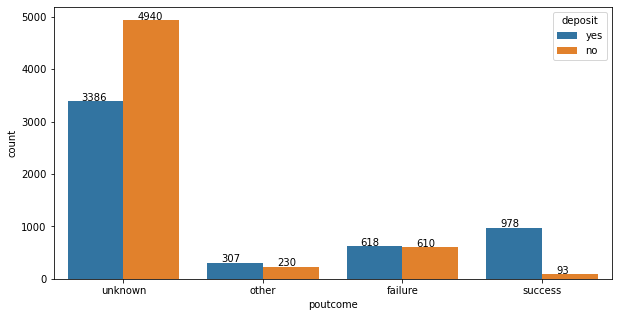

In [171]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="poutcome", hue="deposit", data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.show()

Text(0.5, 1.0, 'Subscribed')

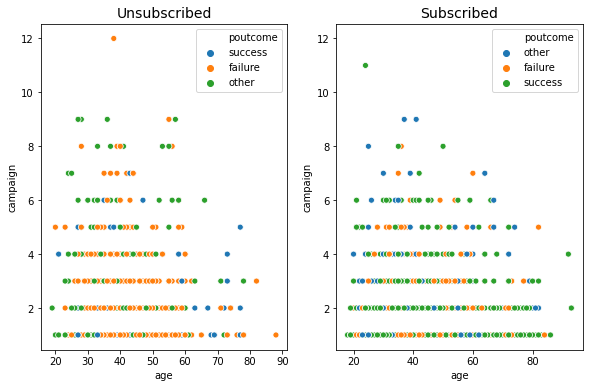

In [130]:
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='campaign', hue='poutcome', data=df[(df['deposit']=='no') & (df['poutcome']!='unknown')],)
plt.title("Unsubscribed", fontsize=14)
plt.subplot(1, 3, 2, sharey=ax1)
sns.scatterplot(x='age', y='campaign', hue='poutcome', data=df[(df['deposit']=='yes') & (df['poutcome']!='unknown')], )
plt.title("Subscribed", fontsize=14)

- We are focussing on success and failure numbers, and we can get information that if client reject to subscribe term deposit, there is chance that for them to subscribe. As on the left side diagram, failure with orange color change into success with green color
- We also can tell client with many clients with 60 years old and above subscribed term deposit

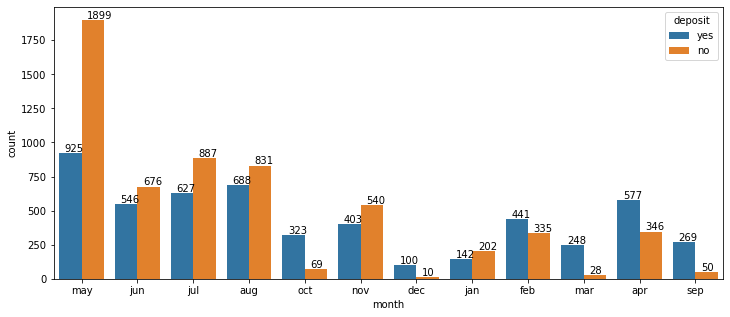

In [131]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(x="month", hue="deposit", data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.show()

- From above diagram, we can tell that successfully campaign happened in February, March, April, September, and October
- Campaign in May, June, July, Aug, and Nov tend to be unsucessfull
- Campaign's activity in Dec and Jan tend to decrease

In [132]:
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [133]:
labelenc = LabelEncoder()
df[category_cols] = df[category_cols].apply(LabelEncoder().fit_transform)

In [134]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,has_loans
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,0
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0,1
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0,1


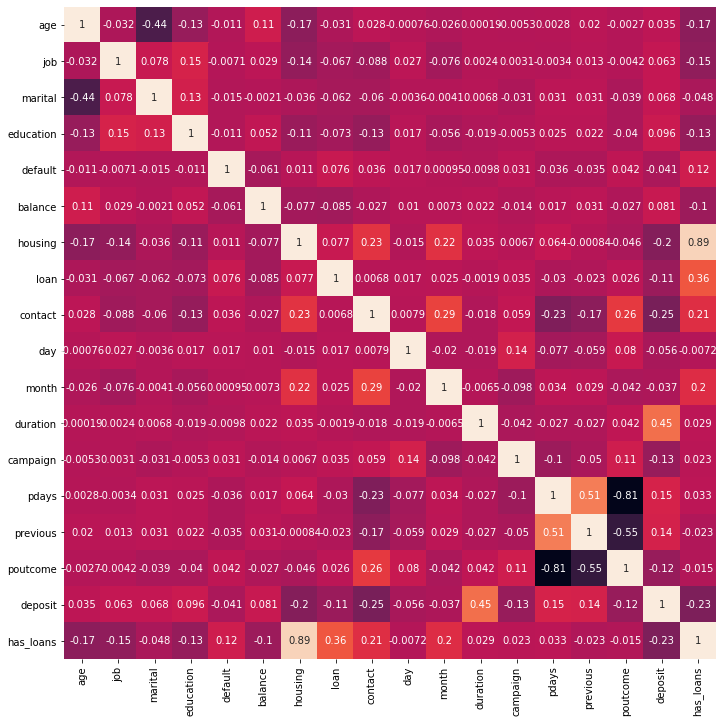

In [135]:
corr_matrix = df.corr()

plt.figure(figsize=(17, 12))
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True, cbar=False)

From correlation graph above, we can tell that:
- duration attribute is highly correlated with target attribute
- besides duration, there is no attributes who has significant correlation with target

## Recommendation


Bank's marketing team should more focus to targeting clients who already married and work in sector management, technician or admin with good financially balance and remember to contact the clients not more than 4 times by using cellular and keep the good coversation duration in order to offer the benefit of subscribing term deposit product 

## Building Model

### Feature Selection

In [37]:
X = df.drop(['deposit','duration'],1)
y = df['deposit']

In [38]:
labelenc = LabelEncoder()
df[category_cols] = df[category_cols].apply(LabelEncoder().fit_transform)

In [39]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,has_loans
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,0
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0,1
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0,1


## Train Test Split Data

In [40]:
from sklearn.model_selection import train_test_split

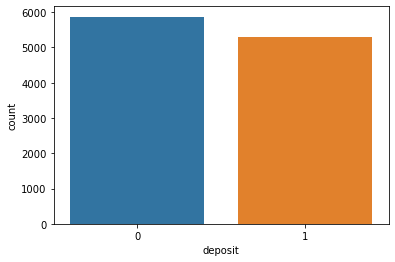

In [41]:
sns.countplot(df['deposit'])

In [42]:
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

The proportion between client who subscribe term deposit and not subscribe deposit is quite balance, so we dont need use SMOTE technique to make the data balance

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

### Logistic Regression

Data is fit into linear regression model, which then be acted upon by a logistic function predicting the target categorical dependent variable. Logistis regrression is an algorithm that is widely used for classification tasks. Consider there are two classes and a new data point is to be checked which class it would belong to. Then algorithms compute probability values that range from 0 and 1. The logistic function that is a sigmoid function is an ‘S’ shaped curve that takes any real values and converts them between 0 to 1. If the output given by a sigmoid function is more than threshold, the output is classified as 1 & if is less than threshold, the output is classified as 0.

In [44]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions_logreg1 = logmodel.predict(X_test)

con = pd.DataFrame(data=confusion_matrix(y_test,predictions_logreg1));
print(con)
print(classification_report(y_test, predictions_logreg1))

      0    1
0  1024  450
1   509  808
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1474
           1       0.64      0.61      0.63      1317

    accuracy                           0.66      2791
   macro avg       0.66      0.65      0.65      2791
weighted avg       0.66      0.66      0.66      2791



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Hyperparametric Tuning
We increase model performance with hyperparameter tuning using GridSearchCV. We choose the best parameter for each model

In [45]:
params = {
    'C': np.logspace(0, 4, num=10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
    }

In [46]:
logreg_search = RandomizedSearchCV(logmodel, params)
logreg_search.fit(X_train,y_train)
logreg_search.best_params_
logreg_search.best_score_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.6687376023110255

In [47]:
logreg_search.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 2.7825594022071245}

In [48]:
predictions_logreg2 = logreg_search.predict(X_test)

con = pd.DataFrame(data=confusion_matrix(y_test,predictions_logreg2));
print(con)
print(classification_report(y_test, predictions_logreg2))

      0    1
0  1019  455
1   503  814
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1474
           1       0.64      0.62      0.63      1317

    accuracy                           0.66      2791
   macro avg       0.66      0.65      0.65      2791
weighted avg       0.66      0.66      0.66      2791



In [49]:
recall_score(y_test, pd.Series(predictions_logreg2))

0.6180713743356112

Cross validation scores: [0.70645843 0.74767917 0.73623769 0.71896611 0.71595489 0.74089764
 0.69270094 0.68162354 0.74538585 0.71345317]


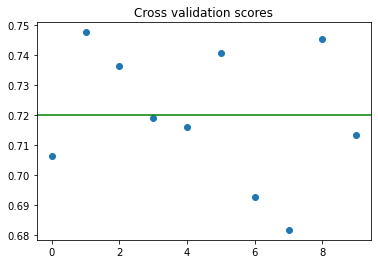

In [50]:
scores_logreg = cross_val_score(estimator=logreg_search,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=-1,
                        scoring = 'roc_auc')

print('Cross validation scores: {}'.format(scores_logreg))

plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores_logreg)), scores_logreg)
plt.axhline(y=np.mean(scores_logreg), color='g') # Mean value of cross validation scores
plt.show()

## XGBoost

XGBoost(Xtreme Gradient Boosting is one of boosting algorithms. Boosting is an ensemble technique where new models are added to correct the errors made by existing models (weak learners). Models are added sequentially until no further improvements can be made. It uses a gradient descent algorithm to minimize the loss when adding new models.

Boosting is based on weak learners (high bias, low variance). In terms of decision trees, weak learners are shallow trees, sometimes even as small as decision stumps (trees with two leaves). Boosting reduces error mainly by reducing bias (and also to some extent variance, by aggregating the output from many models).

In [51]:
xgb = XGBClassifier(random_state=101)
xgb.fit(X_train, y_train)

predictions_xgb = xgb.predict(X_test)
recall_score(y_test, pd.Series(predictions_xgb))

con = pd.DataFrame(data=confusion_matrix(y_test,predictions_xgb));
print(con)
print(classification_report(y_test, predictions_xgb))

      0    1
0  1184  290
1   471  846
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1474
           1       0.74      0.64      0.69      1317

    accuracy                           0.73      2791
   macro avg       0.73      0.72      0.72      2791
weighted avg       0.73      0.73      0.73      2791



In [52]:
recall_score(y_test, pd.Series(predictions_xgb))

0.642369020501139

### Hyperparametric Tuning
We increase model performance with hyperparameter tuning using GridSearchCV. We choose the best parameter for each model

In [53]:
params = {
    'min_child_weight': [0.1, 1, 5, 10, 50],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [5, 10, 25, 50],
    'learning_rate': [0.0001, 0.001, 0.1, 1],
    'n_estimators': [50, 100, 250, 500],
    'reg_alpha': [0.0001, 0.001, 0.1, 1],
    'reg_lambda': [0.0001, 0.001, 0.1, 1]
    }

In [54]:
xgb_search = RandomizedSearchCV(XGBClassifier(), params, 
n_iter =10, cv=9)
xgb_search.fit(X_train,y_train)
xgb_search.best_params_
xgb_search.best_score_

0.7295451891377189

In [55]:
xgb_search.best_params_

{'subsample': 1.0,
 'reg_lambda': 0.1,
 'reg_alpha': 0.0001,
 'n_estimators': 250,
 'min_child_weight': 0.1,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 2,
 'colsample_bytree': 0.8}

In [56]:
predictions_xgb2 = xgb_search.predict(X_test)

con = pd.DataFrame(data=confusion_matrix(y_test,predictions_xgb2));
print(con)
print(classification_report(y_test, predictions_xgb2))

      0    1
0  1202  272
1   503  814
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      1474
           1       0.75      0.62      0.68      1317

    accuracy                           0.72      2791
   macro avg       0.73      0.72      0.72      2791
weighted avg       0.73      0.72      0.72      2791



In [57]:
recall_score(y_test, pd.Series(predictions_xgb2))

0.6180713743356112

Cross validation scores: [0.77271585 0.78626046 0.80259904 0.7883215  0.78583696 0.79957351
 0.77281314 0.76115182 0.81297229 0.78043279]


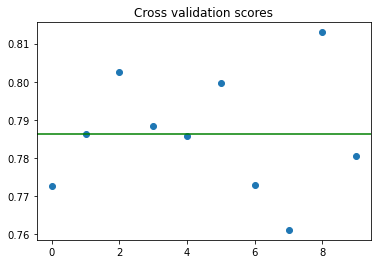

In [58]:
scores_xgb = cross_val_score(estimator=xgb_search,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=-1,
                        scoring = 'roc_auc')

print('Cross validation scores: {}'.format(scores_xgb))

plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores_xgb)), scores_xgb)
plt.axhline(y=np.mean(scores_xgb), color='g') # Mean value of cross validation scores
plt.show()

## Random Forest

Random forest is based on decision tree model. RFs train each tree independently, using a random sample of the data. This randomness helps to make the model more robust than a single decision tree, and less likely to overfit on the training data. Random Forest uses fully grown decision trees (low bias, high variance). It tackles the error reduction task by reducing variance.


In [59]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

predictions_rfc1 = rfc.predict(X_test)
recall_score(y_test, pd.Series(predictions_rfc1))

con = pd.DataFrame(data=confusion_matrix(y_test,predictions_rfc1));
print(con)
print(classification_report(y_test, predictions_rfc1))

      0    1
0  1171  303
1   489  828
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1474
           1       0.73      0.63      0.68      1317

    accuracy                           0.72      2791
   macro avg       0.72      0.71      0.71      2791
weighted avg       0.72      0.72      0.71      2791



In [60]:
recall_score(y_test, pd.Series(predictions_rfc1))

0.6287015945330297

### Hyperparameter Tuning
We increase model performance with hyperparameter tuning using GridSearchCV. We choose the best parameter for each model

In [61]:
param = {'max_depth': [6,9, None], 
         'n_estimators':[50, 70, 100, 150], 
          'max_features': randint(1,6),
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False],
          'min_samples_leaf': randint(1,4)}

In [62]:
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, 
n_iter =10, cv=9)
rnd_search.fit(X_train,y_train)
rnd_search.best_params_
rnd_search.best_score_

0.7245264980166751

In [63]:
rnd_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 5,
 'min_samples_leaf': 3,
 'n_estimators': 150}

In [64]:
predictions_rfc2 = rnd_search.predict(X_test)
recall_score(y_test, pd.Series(predictions_rfc2))

con = pd.DataFrame(data=confusion_matrix(y_test,predictions_rfc2));
print(con)
print(classification_report(y_test, predictions_rfc2))

      0    1
0  1231  243
1   558  759
              precision    recall  f1-score   support

           0       0.69      0.84      0.75      1474
           1       0.76      0.58      0.65      1317

    accuracy                           0.71      2791
   macro avg       0.72      0.71      0.70      2791
weighted avg       0.72      0.71      0.71      2791



In [65]:
recall_score(y_test, pd.Series(predictions_rfc2))

0.5763097949886105

## Model Evaluation

- Model error that we want to reduce is False Positive: the prediction said that people will subscribe/ invest term deposit but the actual people not willing to subscribe term deposit. We need to reduce False Positive so the marketing team will not waste time and marketing cost to client or customers who do not want to subscribe/ invest term deposit
- Marketing team should know customer population profile, who have tendency to subscribe/ invest term deposit so they can make the right marketing strategy material to reach the right clients 
- For best modeling selection, we decide to use precision score and the lowest False Positive score, therefore we use XGBoost Model after hyperparamater tuning implemented

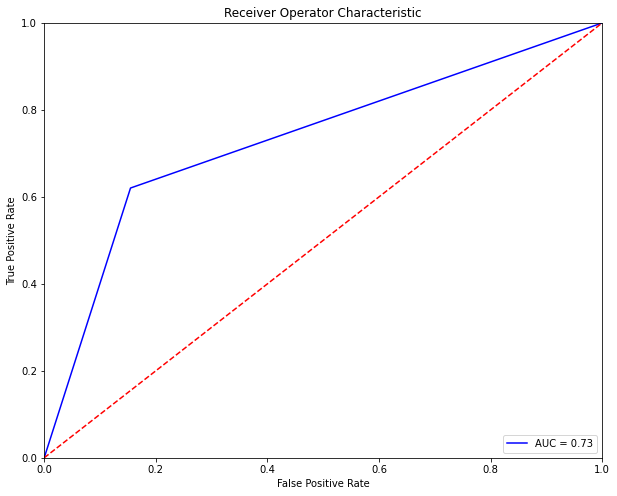

In [136]:
preds = predictions_xgb2
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- ROC = Curve of Probability
<br>
- AUC is 0.73 means the model have 73% chance of correctly predicting people/ customers open term deposit or not

In [137]:
predictions_xgb2 = xgb_search.predict(X_test)

con = pd.DataFrame(data=confusion_matrix(y_test,predictions_xgb2));
print(con)
print(classification_report(y_test, predictions_xgb2))

      0    1
0  1246  228
1   500  817
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      1474
           1       0.78      0.62      0.69      1317

    accuracy                           0.74      2791
   macro avg       0.75      0.73      0.73      2791
weighted avg       0.75      0.74      0.74      2791



1. Accuracy: the proportion of the total number of predictions that were correct. When we use it: When we have balance target on train and test dataset. Example: when build model to classify spam or not spam with balanced target on train and test dataset.
2. Recall: the proportion of actual positive cases that are correctly identified. When we use it: when we have imbalanced target on train or test datasets along with we want to count all actual positive cases in. Example: when we build fraud model, we don't want any actual frauds to be undetectable.
3. Precision: the proportion of predicted positive cases that were correctly identified. When we use it: when we have imbalanced target on train or test datasets along with we want to count all predicted positive cases in. Example: When we build video reccomendation model.
4. F1-Score: the harmonic mean for precision and recall values. When we use it: when we want to consider having the best performance on either precision and recall. Example: when we build delinquency model, we care about not only obtaining delinquent loan but also take care of business opportunity.

Cross validation scores: [0.73121387 0.79522184 0.74011299 0.75308642 0.78716216 0.75504323
 0.75394322 0.77272727 0.81978799 0.77844311]


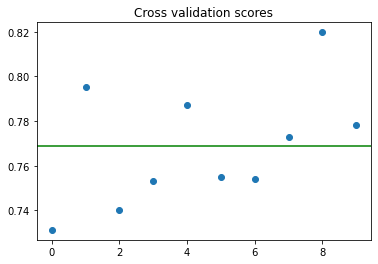

In [138]:
scores_xgb = cross_val_score(estimator=xgb_search,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=-1,
                        scoring = 'precision')

print('Cross validation scores: {}'.format(scores_xgb))

plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores_xgb)), scores_xgb)
plt.axhline(y=np.mean(scores_xgb), color='g') # Mean value of cross validation scores
plt.show()

Precision score varying between 0.74 to 0.82

Cross validation scores: [0.59798995 0.58040201 0.64483627 0.56926952 0.62720403 0.6372796
 0.62720403 0.54156171 0.63979849 0.64483627]


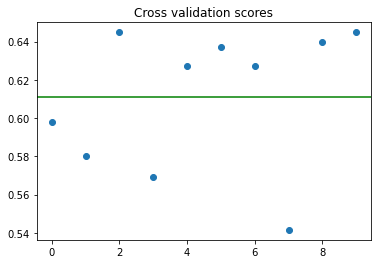

In [139]:
scores_xgb = cross_val_score(estimator=xgb_search,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=-1,
                        scoring = 'recall')

print('Cross validation scores: {}'.format(scores_xgb))

plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores_xgb)), scores_xgb)
plt.axhline(y=np.mean(scores_xgb), color='g') # Mean value of cross validation scores
plt.show()

Recall score varying between 0.58 to 0.66

Cross validation scores: [0.72315036 0.73596177 0.74671446 0.72401434 0.72401434 0.74074074
 0.71804062 0.71565114 0.74551971 0.74074074]


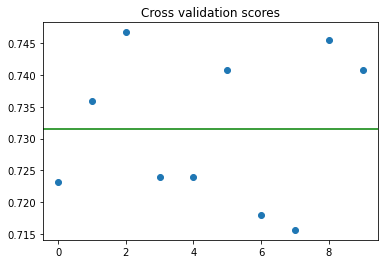

In [173]:
scores_xgb = cross_val_score(estimator=xgb_search,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=-1,
                        scoring = 'accuracy')

print('Cross validation scores: {}'.format(scores_xgb))

plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores_xgb)), scores_xgb)
plt.axhline(y=np.mean(scores_xgb), color='g') # Mean value of cross validation scores
plt.show()

Accuracy score varying between 0.71 to 0.74

## Final Conclusion

In order to increase client subscribers of term deposit, here are some strategies need to do:
1. Data showed that client with job profession from blue-collar, entrepreneur, housemaid, etc are somewhat benefitial but before contact to them, marketing team should check their balance, loan, and education as consideration. It would be more successful if marketing team approach client who work as management, technician, or retired people especially for them that high balance amount in their bank account
1. Prepare marketing material to be more interesting to attract client, the more enganging communication will increase chances for client to open term deposit
1. According to analysis, most subscribers are the ones who are contacted in months of February to May and Septemeber and October. So cutting down the activities in other months and focusing more in these periods will be benificial.
1. There are many loan-free clients who subscribed to the term deposit and also there are some clients who do have loan but still subscribed to the deposit and there are loan-free ones who didn't subscribed to the deposit. The main reason for this is the balance. The ones with sufficiently good balance are tend to subscribe to the term deposit.
1. Based on data, the number of contacts made with most of the subscribers is less than 4. Therefore, contacting person for more than 3-4 time should be avoided.
1. According analysis, we can tell that clients with high education level having knowledge to understand the importance of investing term deposit, so the marketing team can try to offer this kind of client population